In [1]:
# https://grouplens.org/datasets/movielens/25m/

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

movies = pd.read_csv('movies.csv')
g_t = pd.read_csv('genome-tags.csv')
g_s = pd.read_csv('genome-scores.csv')
rating = pd.read_csv('ratings.csv')

In [2]:
display(movies.head(),g_t.head(),g_s.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [3]:
genome = g_s.merge(g_t, on='tagId', how='left')
genome.head()

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,1,2,0.02375,007 (series)
2,1,3,0.06250,18th century
3,1,4,0.07575,1920s
4,1,5,0.14075,1930s


In [4]:
df1 = genome[genome['relevance'] > 0.3]
df1.reset_index(drop=True, inplace=True)
df1.head()

,movieId,tagId,relevance,tag
0,1,11,0.58025,3d
1,1,19,0.66250,action
2,1,20,0.30075,action packed
3,1,21,0.31675,adaptation
4,1,29,0.89375,adventure


In [5]:
df2 = df1.groupby('movieId')['tag'].apply(lambda x: ', '.join(x)).reset_index()
df2.head()

,movieId,tag
0,1,"3d, action, action packed, adaptation, adventu..."
1,2,"action, action packed, adaptation, adapted fro..."
2,3,"adventure, betrayal, catastrophe, chase, comed..."
3,4,"adaptation, adapted from:book, adultery, bad a..."
4,5,"bittersweet, boston, california, catastrophe, ..."


In [6]:
df3 = movies.merge(df2, on='movieId', how='left')

rating = rating.drop(columns=['userId','timestamp'])
df4 = df3.merge(rating, on='movieId', how='left')
df4

,movieId,title,genres,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
...,...,...,...,...,...
25003466,209157,We (2018),Drama,NaN,1.5
25003467,209159,Window of the Soul (2001),Documentary,NaN,3.0
25003468,209163,Bad Poems (2018),Comedy|Drama,NaN,4.5
25003469,209169,A Girl Thing (2001),(no genres listed),NaN,3.0


x = df4['title'].unique()

Avg_rating = []
movieId = []

for i in range (len(x)):
    df5 = df4[df4['title']==x[i]]
    movieId.append(df5['movieId'].max())
    a = (df5['rating'].mean(),1)
    Avg_rating.append(a)

r = pd.Dataframe(Avg_rating,movieId)

In [8]:
df4

,movieId,title,genres,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",4.0
...,...,...,...,...,...
25003466,209157,We (2018),Drama,NaN,1.5
25003467,209159,Window of the Soul (2001),Documentary,NaN,3.0
25003468,209163,Bad Poems (2018),Comedy|Drama,NaN,4.5
25003469,209169,A Girl Thing (2001),(no genres listed),NaN,3.0


In [9]:
df3

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"action, action packed, adaptation, adapted fro..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"adventure, betrayal, catastrophe, chase, comed..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"adaptation, adapted from:book, adultery, bad a..."
4,5,Father of the Bride Part II (1995),Comedy,"bittersweet, boston, california, catastrophe, ..."
...,...,...,...,...
62418,209157,We (2018),Drama,NaN
62419,209159,Window of the Soul (2001),Documentary,NaN
62420,209163,Bad Poems (2018),Comedy|Drama,NaN
62421,209169,A Girl Thing (2001),(no genres listed),NaN


In [6]:
b = rating.groupby('movieId')['rating'].apply(np.count_nonzero).reset_index()
b = pd.DataFrame(b)

new_df = rating.groupby('movieId')['rating'].apply(np.mean).reset_index()
new_df['avg_rating'] = new_df['rating'].apply(lambda x: round(x,1))
new_df['No_reviews'] = b['rating']
new_df = new_df.drop(columns=['rating'])
new_df.head()

,movieId,avg_rating,No_reviews
0,1,3.9,57309
1,2,3.3,24228
2,3,3.1,11804
3,4,2.9,2523
4,5,3.1,11714


In [7]:
df3 = movies.merge(df2, on='movieId', how='left')
df5 = df3.merge(new_df, on='movieId', how='left')
df5.head()

,movieId,title,genres,tag,avg_rating,No_reviews
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.9,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"action, action packed, adaptation, adapted fro...",3.3,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"adventure, betrayal, catastrophe, chase, comed...",3.1,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"adaptation, adapted from:book, adultery, bad a...",2.9,2523.0
4,5,Father of the Bride Part II (1995),Comedy,"bittersweet, boston, california, catastrophe, ...",3.1,11714.0


In [8]:
def add_genres_to_tag(row):
    if pd.isnull(row['tag']):
        return row['genres'].replace("|", ",")
    else:
        return row['tag'] + "," + row['genres'].replace("|", ",")

df5['tag'] = df5.apply(lambda row: add_genres_to_tag(row), axis=1)
df5 = df5.dropna()

# WordNet Lemmatizer

In [9]:
def remove_duplicates(l):
    d = []
    u = []
    for i in range (len(l)):
        if l[i] in l[i+1:]:
            d.append(l[i])
        else:
            u.append(l[i])
    return ''.join(u)

In [10]:
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df5['lem_tag'] = df5['tag'].apply(lambda x: lemmatizer.lemmatize(x))
df5['lem_tag'] = df5['tag'].apply(lambda x: x.split())
#df5['lem_tag'] = df5['tag'].str.strip().str.split(",").tolist()
df5['lem_tag'] = df5['lem_tag'].apply(lambda x: remove_duplicates(x))
df5 = df5.dropna()
df5.head(10)

,movieId,title,genres,tag,avg_rating,No_reviews,lem_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"3d, action, action packed, adaptation, adventu...",3.9,57309.0,"3d,actionpacked,adaptation,adventure,affection..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,"action, action packed, adaptation, adapted fro...",3.3,24228.0,"actionpacked,adaptation,adaptedfrom:book,adven..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"adventure, betrayal, catastrophe, chase, comed...",3.1,11804.0,"adventure,betrayal,catastrophe,chase,crappycul..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"adaptation, adapted from:book, adultery, bad a...",2.9,2523.0,"adaptation,adaptedfrom:book,adultery,acting,ba..."
4,5,Father of the Bride Part II (1995),Comedy,"bittersweet, boston, california, catastrophe, ...",3.1,11714.0,"bittersweet,boston,california,catastrophe,chas..."
5,6,Heat (1995),Action|Crime|Thriller,"action, action packed, adaptation, amazing cin...",3.9,24588.0,"actionpacked,adaptation,amazinganti-hero,assas..."
6,7,Sabrina (1995),Comedy|Romance,"adaptation, based on a play, beautiful scenery...",3.4,12132.0,"adaptation,basedonaplay,beautifulscenery,betra..."
7,8,Tom and Huck (1995),Adventure|Children,"adaptation, adapted from:book, adventure, base...",3.1,1344.0,"adaptedfrom:book,adventure,abasedonbetrayal,bo..."
8,9,Sudden Death (1995),Action,"action, action packed, arms dealer, assassin, ...",3.0,3711.0,"actionpacked,armsdealer,assassin,assassination..."
9,10,GoldenEye (1995),Action|Adventure|Thriller,"007, 007 (series), 80s, action, action packed,...",3.4,28265.0,"007,007(series),80s,actionpacked,adventure,alt..."


# visualization

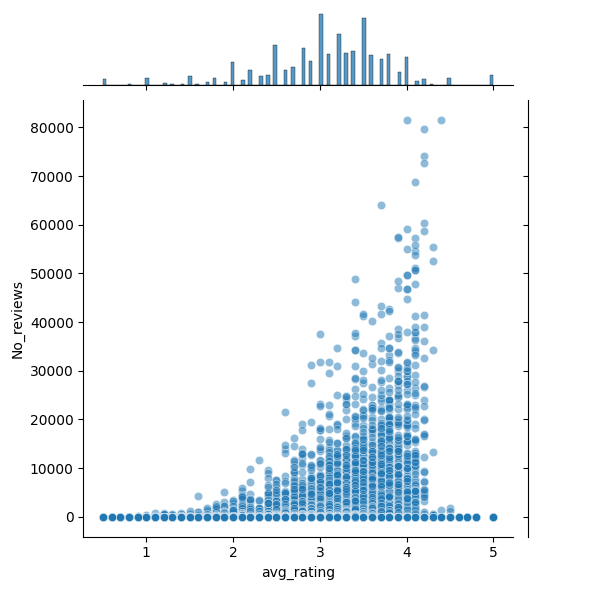

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x='avg_rating',y='No_reviews',data=df5,alpha=0.5)

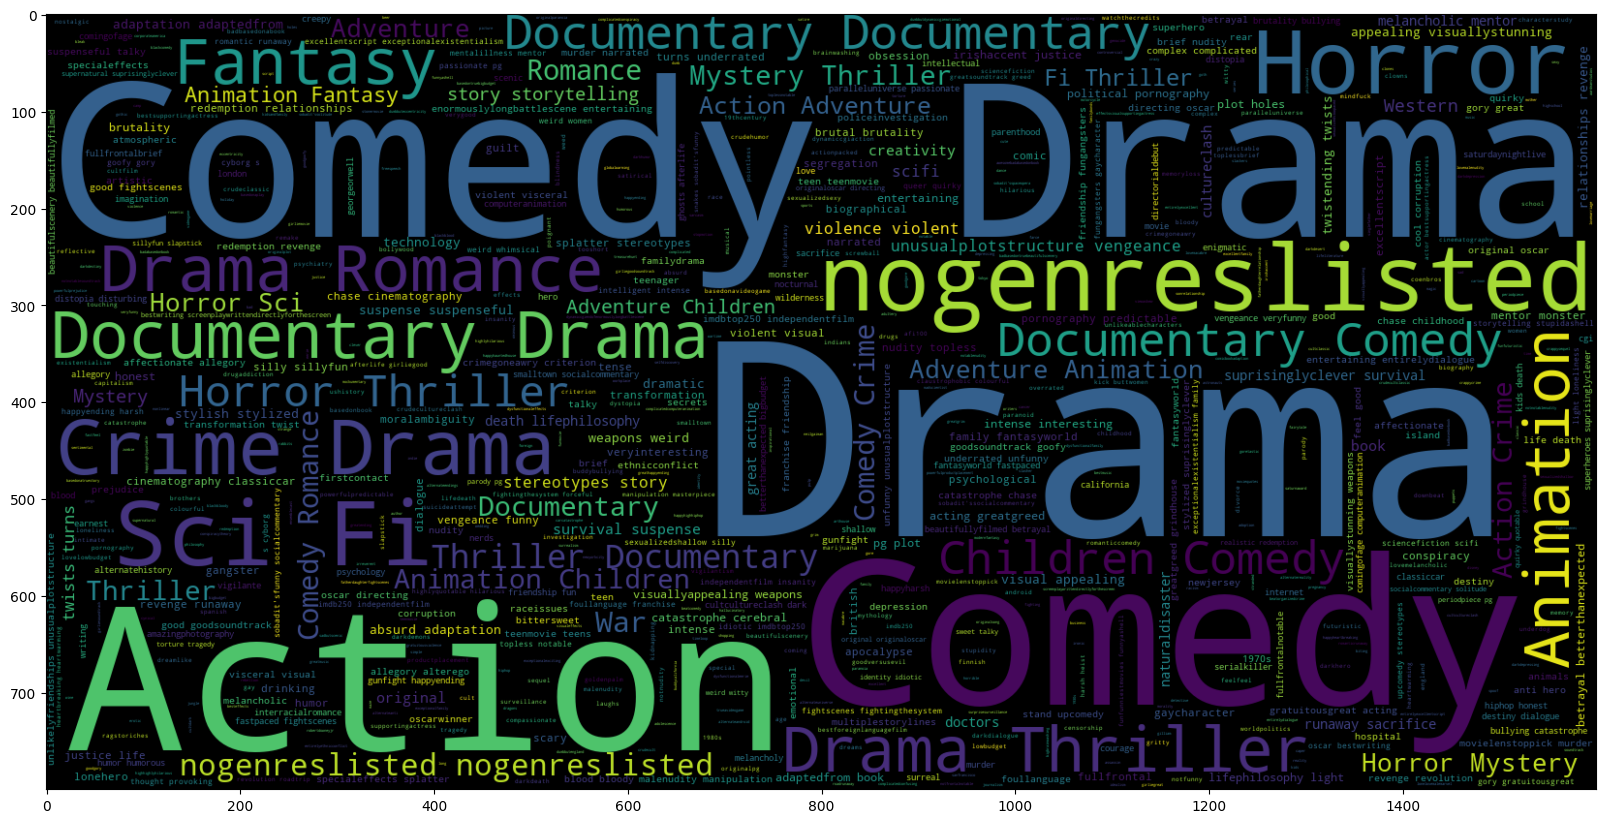

In [33]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(df5['lem_tag'].tail(2000))))
plt.imshow(wc,interpolation = 'bilinear')

# Count Vectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
df6 = df5[['lem_tag','title']].head(30000)

titles = df6['title'].tolist()
df7 = countvec.fit_transform(df6['lem_tag'])

tag_bow1 = pd.DataFrame(df7.toarray(), columns = countvec.get_feature_names_out(),index=titles).fillna(0)
print("Bag of Words for Title: ")
tag_bow1.head()

,007,100,11,13,18th1920s,18th1930s,18th1950s,18th1960s,18th1970s,18th19thcentury,...,worldwari,worldwarii,writer,writers,writing,wuxia,wwii,york,zombie,zombies
Toy Story (1995),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Jumanji (1995),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Waiting to Exhale (1995),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df8 = df5.drop(columns=['movieId','tag','lem_tag'])
df8 = np.transpose(df8)
header_row = 0
df8.columns = df8.iloc[header_row]
df8 = df8.drop('title')
df8.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Liberté (2019),The Carpet of Horror (1962),Mao Zedong 1949 (2019),Happy Flight (2008),Santosh Subramaniam (2008),We (2018),Window of the Soul (2001),Bad Poems (2018),A Girl Thing (2001),Women of Devil's Island (1962)
genres,Adventure|Animation|Children|Comedy|Fantasy,Adventure|Children|Fantasy,Comedy|Romance,Comedy|Drama|Romance,Comedy,Action|Crime|Thriller,Comedy|Romance,Adventure|Children,Action,Action|Adventure|Thriller,...,Drama,Crime|Horror,(no genres listed),Comedy|Drama,Action|Comedy|Romance,Drama,Documentary,Comedy|Drama,(no genres listed),Action|Adventure|Drama
avg_rating,3.9,3.3,3.1,2.9,3.1,3.9,3.4,3.1,3.0,3.4,...,1.0,2.2,3.5,2.5,5.0,1.5,3.0,4.5,3.0,3.0
No_reviews,57309.0,24228.0,11804.0,2523.0,11714.0,24588.0,12132.0,1344.0,3711.0,28265.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
# Calculate the cosine similarity matrix between the movies
cosine_similarity = cosine_similarity(tag_bow1)

# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=tag_bow1.index, columns=tag_bow1.index)

In [99]:
# Ask the user for a movie they like
movie = input('Enter a movie you like: ')

# Find the index of the movie in the similarity dataframe
movie_index = similarity_df.index.get_loc(movie)

# Get the top 5 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

Top_10=[]
for i in range (len(top_10)):
    Top_10.append(top_10.index[i])

print(f'Top 10 similar movies to {movie}:')
df8[Top_10]

Enter a movie you like:  Memento (2000)


Top 10 similar movies to Memento (2000):


title,Old Boy (2003),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),Following (1998),The Machinist (2004),Fight Club (1999),Donnie Darko (2001),"Departed, The (2006)",Run Lola Run (Lola rennt) (1998),Taxi Driver (1976)
genres,Mystery|Thriller,Crime|Mystery|Thriller,Mystery|Thriller,Crime|Mystery|Thriller,Drama|Mystery|Thriller,Action|Crime|Drama|Thriller,Drama|Mystery|Sci-Fi|Thriller,Crime|Drama|Thriller,Action|Crime,Crime|Drama|Thriller
avg_rating,4.1,4.3,4.1,3.8,3.8,4.2,4.0,4.1,4.0,4.1
No_reviews,11987.0,55366.0,50596.0,1645.0,8982.0,58773.0,27181.0,25343.0,18891.0,29133.0
